In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib ipympl
from pianoq.lab.lee_holo.generate_lee import main, make_oam_donut, orthogonal_lee
import matplotlib.pyplot as plt 
from pianoq.lab.dmd import DMD
from pianoq.lab.VimbaCamera import VimbaCamera
from pianoq.misc.mplt import mimshow
import numpy as np 
from pianoq.misc.misc import colorize

"""
G:/My Drive/Equipment (Specs, Drivers, Manuals)/Ajile DMD/dlp4500.pdf
dx_DMD = 7.637e-6
dx_cam = 4.8e-6
laser wl = 633e-9
f1=100e-3 #mm 
f2=40e-3 #mm 
"""

'\nG:/My Drive/Equipment (Specs, Drivers, Manuals)/Ajile DMD/dlp4500.pdf\ndx_DMD = 7.637e-6\ndx_cam = 4.8e-6\nlaser wl = 633e-9\nf1=100e-3 #mm \nf2=40e-3 #mm \n'

In [3]:
dmd = DMD()

Connected!
Built project!


In [ ]:
dmd.other_pos = True
dmd.set_white()

In [ ]:
dmd.set_white_between(240, 650, 270, 670)

In [ ]:
dmd.close()

In [4]:
cam = VimbaCamera(0)

INFO:vmbpyLog:Starting vmbpy: 1.0.4 (using VmbC: 1.0.5, VmbImageTransform: 2.0)
ERROR:vmbpyLog:<VmbError.GenTLUnspecified: -22>


VmbCameraError: <VmbError.GenTLUnspecified: -22>

In [ ]:
from pianoq.misc.borders import Borders
# cam.set_borders(Borders(200, 270, 650, 650))
cam.set_exposure_time(300)
cam.show_image()
# cam.save_image(r'G:\My Drive\Projects\DMD\quantum\Results\Classical\open_pinhole.cam')

In [ ]:
GRATING_PERIOD_PX = 5
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)
target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=1, r0=0.15, sigma=0.05)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))
fig, ax = plt.subplots()
ax.imshow(hologram)
ax.set_xlim(300, 600)
ax.set_ylim(400, 750)

In [ ]:
from pianoq.lab.scripts.live_camera import live_cam
# live_cam(cam, cut_line=250)

In [ ]:
GRATING_PERIOD_PX = 8 
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)
target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=4, r0=0.15, sigma=0.05)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))

mimshow(colorize(target), title='target', figshow=False)

cam.set_exposure_time(50)
im = cam.get_image()
E_k = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im)))
mimshow(hologram, title='hologram', figshow=False)
mimshow(im, title='original image', figshow=False)
mimshow(np.abs(E_k)**2, vmax=1e10, title='Fourier space', figshow=False)
cropped = E_k[420:500, 720:800]
mimshow(np.abs(cropped)**2, figshow=False, title='cropped Fourier space')
final_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(cropped)))
mimshow(colorize(final_field), vmax=2000, title='final field', figshow=False)
mimshow(np.angle(final_field), title='final phase', figshow=False)

In [ ]:
dmd.set_grating(50)

In [ ]:
dmd.set_white()

In [ ]:
dmd.close()

In [ ]:
dmd.set_white()

In [ ]:
cam.close()

In [ ]:
cam.close()

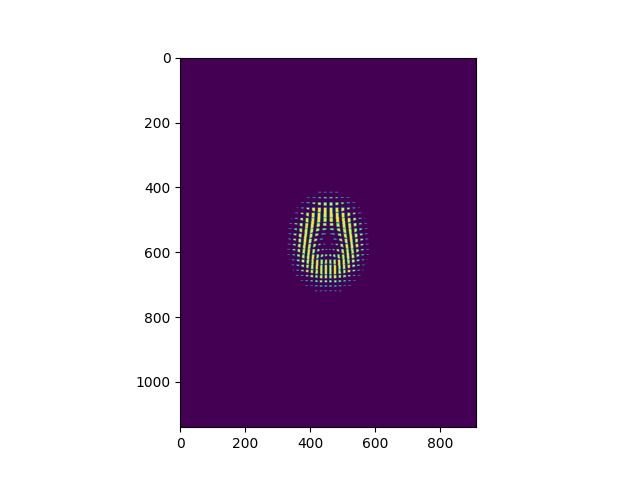

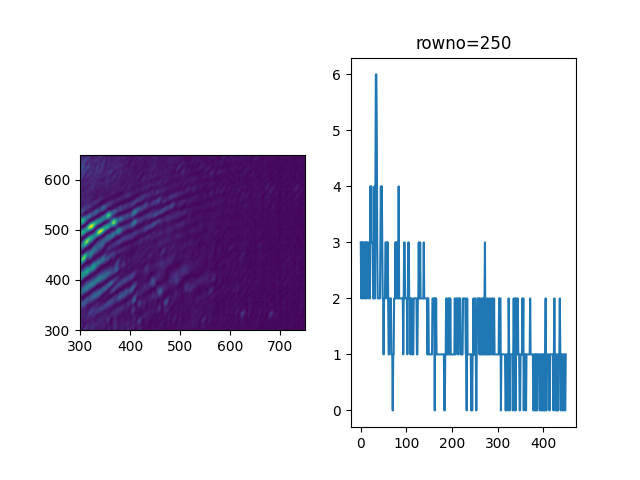

In [17]:
# calc Lee hologram 
GRATING_PERIOD_PX = 16            # p (pixels)  ⇒ ν = 1/p cycles/pixel
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)  # along +x by default

target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=4, r0=0.15, sigma=0.05)
# target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=0, r0=0.0, sigma=0.2)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)

if True:
    fig, ax = plt.subplots()
    ax.imshow(hologram)

# cam.set_exposure_time(5000)
dmd.set_image(hologram.astype(bool))
# im = cam.get_image()

if True:
    fig, ax = plt.subplots(1, 2)
    rowno = 250
    ax[0].imshow(im)
    ax[0].axhline(rowno, ls='--', color='green')
    ax[0].set_xlim(300, 750)
    ax[0].set_ylim(300, 650)
    ax[1].plot(im[rowno, 300:750])
    ax[1].set_title(f'{rowno=}')

In [ ]:
main(12)

In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib ipympl
from pianoq.lab.lee_holo.generate_lee import main, make_oam_donut, orthogonal_lee
import matplotlib.pyplot as plt 
from pianoq.lab.dmd import DMD
from pianoq.lab.VimbaCamera import VimbaCamera
from pianoq.misc.mplt import mimshow
import numpy as np 
from pianoq.misc.misc import colorize
cam = VimbaCamera(0)
dmd = DMD()
from pianoq.lab.scripts.live_camera import live_cam


INFO:vmbpyLog:Starting vmbpy: 1.0.4 (using VmbC: 1.0.5, VmbImageTransform: 2.0)


Connected!
Built project!


(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'final phase'}>)

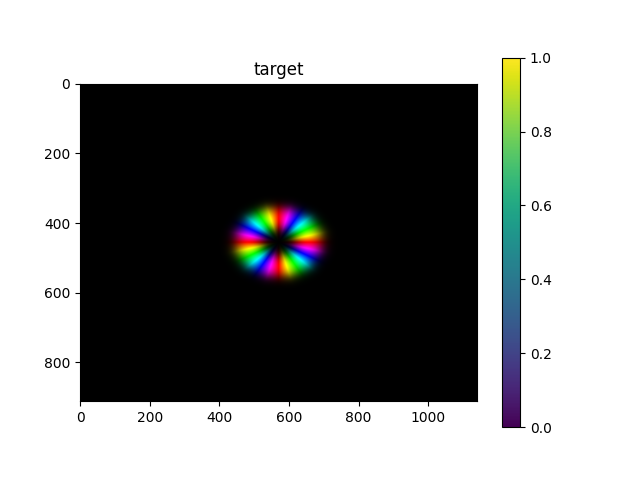

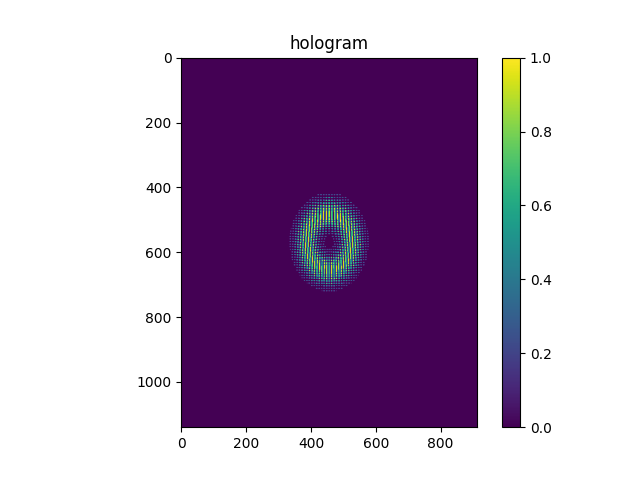

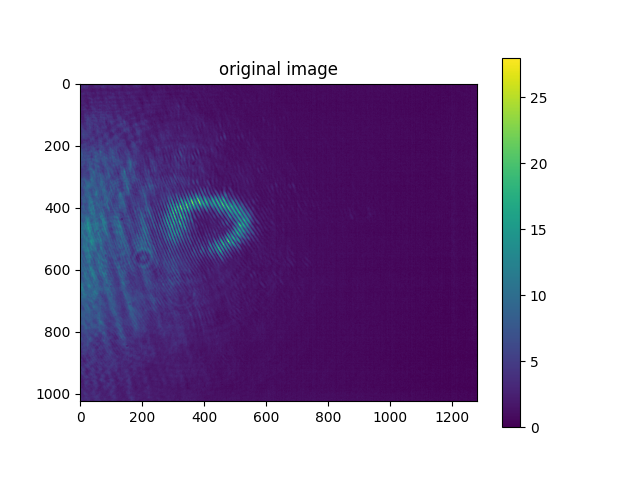

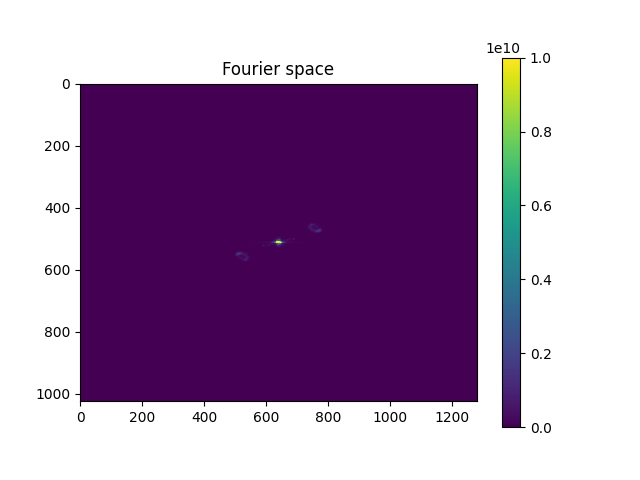

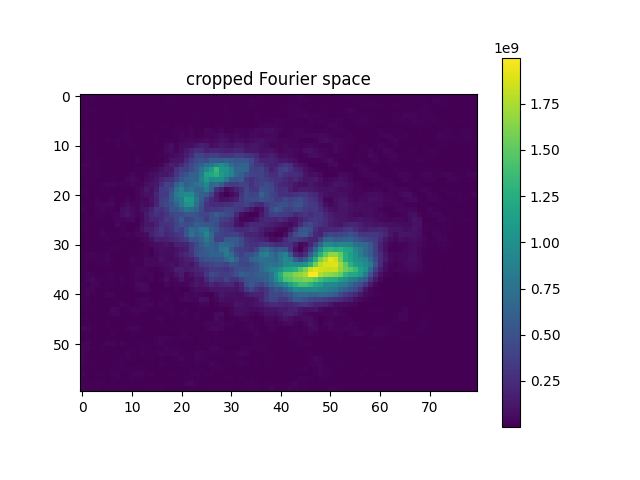

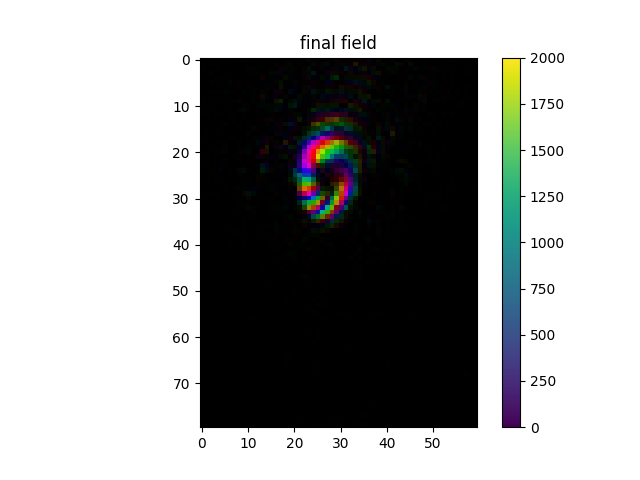

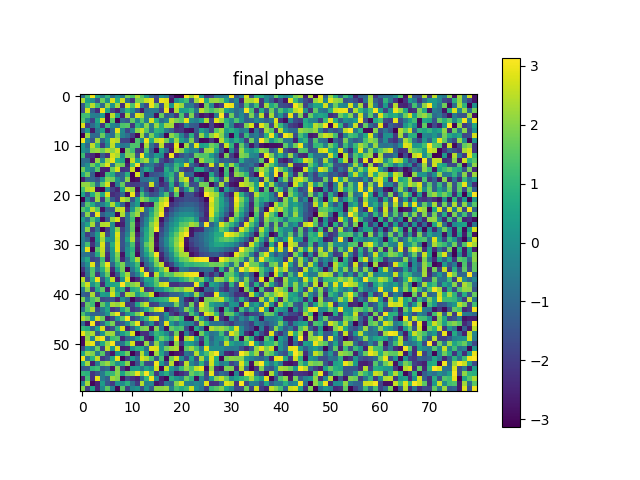

In [74]:
GRATING_PERIOD_PX = 8 
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)
target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=4, r0=0.15, sigma=0.05)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))

mimshow(colorize(target), title='target', figshow=False)

cam.set_exposure_time(50)
im = cam.get_image()
E_k = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im)))
mimshow(hologram, title='hologram', figshow=False)
mimshow(im, title='original image', figshow=False)
mimshow(np.abs(E_k)**2, vmax=1e10, title='Fourier space', figshow=False)
cropped = E_k[440:500, 720:800]
mimshow(np.abs(cropped)**2, figshow=False, title='cropped Fourier space')
final_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(cropped)))
mimshow(colorize(final_field), vmax=2000, title='final field', figshow=False)
mimshow(np.angle(final_field), title='final phase', figshow=False)

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'final field'}>)

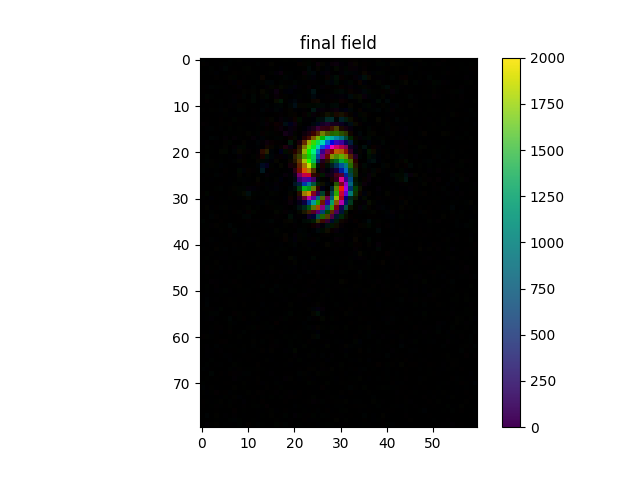

In [103]:
GRATING_PERIOD_PX = 8
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)
target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=5, r0=0.15, sigma=0.05)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))

# mimshow(colorize(target), title='target', figshow=False)

cam.set_exposure_time(50)
im = cam.get_image()
E_k = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im)))
# mimshow(hologram, title='hologram', figshow=False)
# mimshow(im, title='original image', figshow=False)
# mimshow(np.abs(E_k)**2, vmax=1e10, title='Fourier space', figshow=False)
cropped = E_k[440:500, 720:800]
# mimshow(np.abs(cropped)**2, figshow=False, title='cropped Fourier space')
final_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(cropped)))
mimshow(colorize(final_field), vmax=2000, title='final field', figshow=False)

In [52]:
final_field.shape

(80, 80)

In [53]:
def live_lee(cam, interval=100, close_at_end=False, remove_min=True, cut_line=None, show_max=True, roi=None, **kwargs):
    if cut_line is None:
        fig, ax = plt.subplots()
    else:
        fig, axes = plt.subplots(2)
        ax = axes[0]
        ax_line = axes[1]
    if roi is not None:
        imm = cam.get_image(roi=roi)
    else:
        imm = cam.get_image()
    if remove_min:
        imm -= imm.min()
    # im = ax.imshow(imm, **kwargs)
    E_k = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(imm)))
    cropped = E_k[420:500, 720:800]
    final_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(cropped)))
    im = ax.imshow(colorize(final_field), vmax=2000)
    title = fig.suptitle('foo', fontsize=36)
    # fig.colorbar(im, ax=ax)
    if cut_line is not None:
        line = ax_line.plot(imm[cut_line, :])
        line = line[0]

    def update(i):
        if roi is not None:
            imm = cam.get_image(roi=roi)
        else:
            imm = cam.get_image()
        if remove_min:
            imm -= imm.min()
        im.set_data(imm)
        if show_max:
            title.set_text(f'Max pixel: {imm.max():.3f}')
        else:
            title.set_text(f'Total power: {imm.sum():.3f}')
        ax.set_title('%03d' % i)
        if cut_line is not None:
            line.set_ydata(imm[cut_line, :])

    global ani
    ani = FuncAnimation(fig, update, interval=interval)  # in ms

    def close(event):
        if event.key == 'q':
            plt.close(event.canvas.figure)
            if close_at_end:
                cam.close()

    cid = fig.canvas.mpl_connect("key_press_event", close)

    plt.show(block=False)

C:\code\pianoq\pianoq\lab\scripts\live_camera.py:52: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=interval)  # in ms


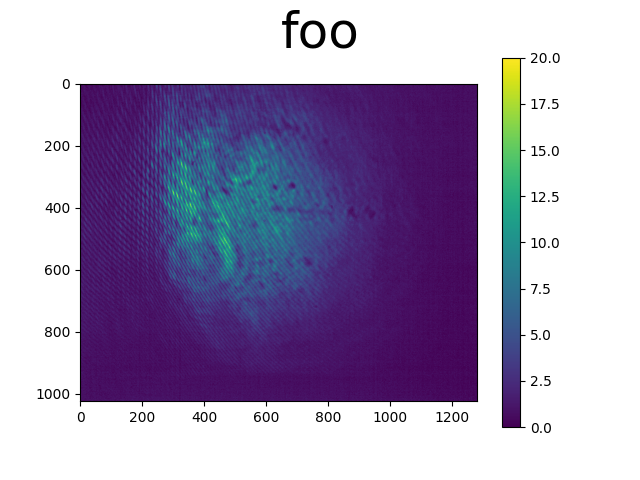

In [98]:
live_cam(cam)

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'meas field'}>)

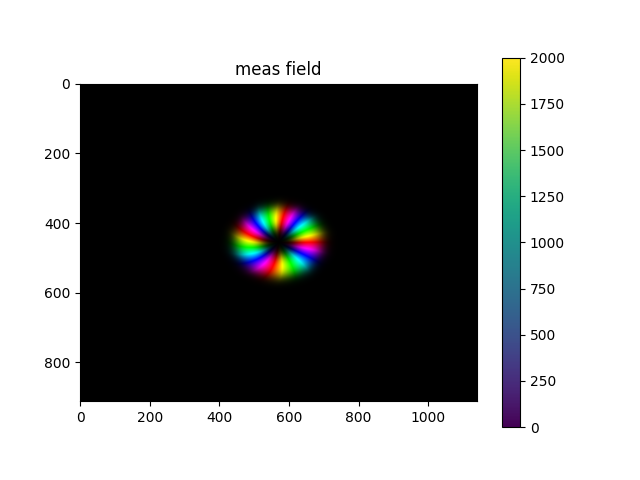

In [23]:
target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=4, r0=0.15, sigma=0.05)
# mimshow(colorize(target), title='target', figshow=False)

x = np.linspace(-1, 1, dmd.Nx, endpoint=False)
y = np.linspace(-1, 1, dmd.Ny, endpoint=False)
X, Y = np.meshgrid(x, y)
X0 = 0
Y0 = 0.2

alpha = 10
sqr_phase = np.exp(1j * alpha*((X-X0)**2 + ((Y-Y0)**2)))
# mimshow(colorize(sqr_phase), title='sqr phase', figshow=False)

meas_field = target * sqr_phase
mimshow(colorize(meas_field), vmax=2000, title='meas field', figshow=False)

In [92]:
cam.set_exposure_time(50)

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'final field'}>)

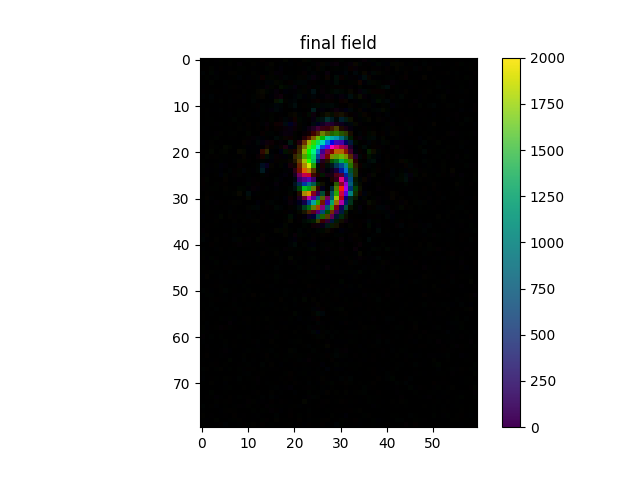

In [104]:
GRATING_PERIOD_PX = 8
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)
target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=5, r0=0.15, sigma=0.05)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))

# mimshow(colorize(target), title='target', figshow=False)

cam.set_exposure_time(50)
im = cam.get_image()
E_k = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im)))
# mimshow(hologram, title='hologram', figshow=False)
# mimshow(im, title='original image', figshow=False)
# mimshow(np.abs(E_k)**2, vmax=1e10, title='Fourier space', figshow=False)
cropped = E_k[440:500, 720:800]
# mimshow(np.abs(cropped)**2, figshow=False, title='cropped Fourier space')
final_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(cropped)))
mimshow(colorize(final_field), vmax=2000, title='final field', figshow=False)

(1140, 912)


(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'final field'}>)

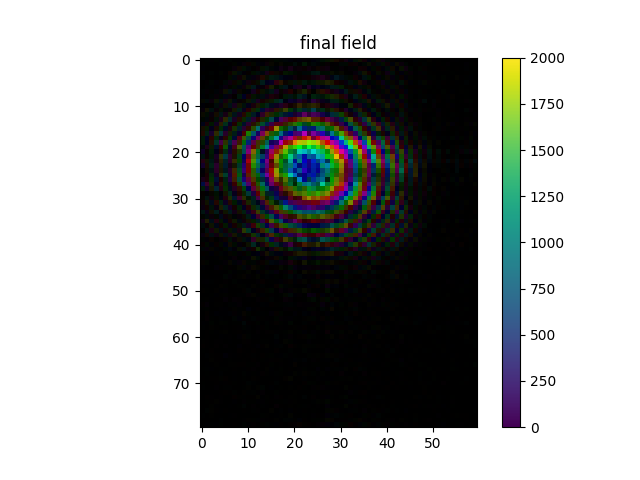

In [105]:
GRATING_PERIOD_PX = 8
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)
target = np.ones((1140, 912))
print(target.shape)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))

# mimshow(colorize(target), title='target', figshow=False)

cam.set_exposure_time(50)
im = cam.get_image()
E_k = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im)))
# mimshow(hologram, title='hologram', figshow=False)
# mimshow(im, title='original image', figshow=False)
# mimshow(np.abs(E_k)**2, vmax=1e10, title='Fourier space', figshow=False)
cropped = E_k[440:500, 720:800]
# mimshow(np.abs(cropped)**2, figshow=False, title='cropped Fourier space')
final_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(cropped)))
mimshow(colorize(final_field), vmax=2000, title='final field', figshow=False)


In [106]:
sqr_phase_field = final_field.copy()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'cropped Fourier space'}>)

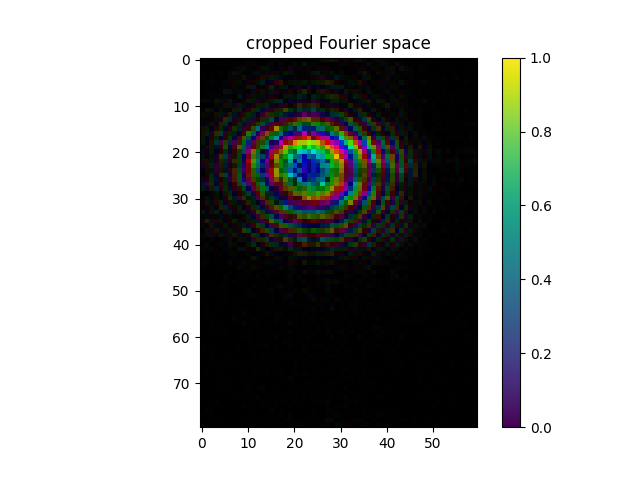

In [107]:
mimshow(colorize(sqr_phase_field), figshow=False, title='cropped Fourier space')

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'final field ell=6'}>)

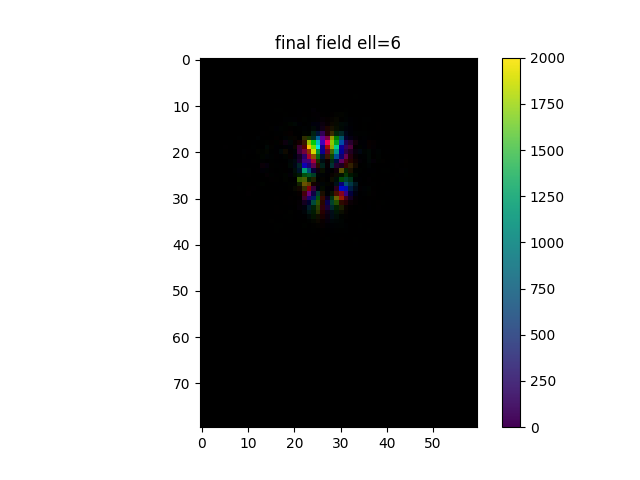

In [117]:
GRATING_PERIOD_PX = 8
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)
ell_val = 6
target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=ell_val, r0=0.15, sigma=0.05)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)
dmd.set_image(hologram.astype(bool))

# mimshow(colorize(target), title='target', figshow=False)

cam.set_exposure_time(50)
im = cam.get_image()
E_k = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(im)))
# mimshow(hologram, title='hologram', figshow=False)
# mimshow(im, title='original image', figshow=False)
# mimshow(np.abs(E_k)**2, vmax=1e10, title='Fourier space', figshow=False)
cropped = E_k[440:500, 720:800]
# mimshow(np.abs(cropped)**2, figshow=False, title='cropped Fourier space')
final_field = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(cropped)))
mimshow(colorize(final_field*np.conjugate(sqr_phase_field)), vmax=2000, title=f'final field ell={ell_val}', figshow=False)